In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
#Getting the list of classes

def get_classname_from_string(string):
    if(string.endswith(".jpg")):
        string = string[:-4]
    words = string.split()
    current_class = ''.join(map(lambda c: '' if c in '0123456789' else c, words[0]))
    current_class = current_class[:-1]
    return current_class

classes = set()
with open('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt') as annotations_list:
    for line in annotations_list:
        if line[0]!="#":
            current_class = get_classname_from_string(line)
            classes.add(current_class)


classes_dictionary = {k: v for v, k in enumerate(classes)}# classname--> int 
classnumber_to_name_dict = {v: k for k, v in classes_dictionary.items()} # int --> classname
#print(classes_dictionary)

In [3]:
print(classes_dictionary)
print(classnumber_to_name_dict)

{'leonberger': 0, 'Maine_Coon': 1, 'Persian': 2, 'Bengal': 3, 'miniature_pinscher': 4, 'chihuahua': 5, 'saint_bernard': 6, 'havanese': 7, 'staffordshire_bull_terrier': 8, 'yorkshire_terrier': 9, 'beagle': 10, 'american_bulldog': 11, 'Birman': 12, 'Bombay': 13, 'Ragdoll': 14, 'german_shorthaired': 15, 'boxer': 16, 'pug': 17, 'american_pit_bull_terrier': 18, 'scottish_terrier': 19, 'Abyssinian': 20, 'english_setter': 21, 'japanese_chin': 22, 'newfoundland': 23, 'Russian_Blue': 24, 'Egyptian_Mau': 25, 'British_Shorthair': 26, 'keeshond': 27, 'shiba_inu': 28, 'basset_hound': 29, 'Sphynx': 30, 'Siamese': 31, 'pomeranian': 32, 'wheaten_terrier': 33, 'samoyed': 34, 'great_pyrenees': 35, 'english_cocker_spaniel': 36}
{0: 'leonberger', 1: 'Maine_Coon', 2: 'Persian', 3: 'Bengal', 4: 'miniature_pinscher', 5: 'chihuahua', 6: 'saint_bernard', 7: 'havanese', 8: 'staffordshire_bull_terrier', 9: 'yorkshire_terrier', 10: 'beagle', 11: 'american_bulldog', 12: 'Birman', 13: 'Bombay', 14: 'Ragdoll', 15: '

In [4]:
filenames = os.listdir("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/")

#The dataset turned out to have some images with incorrect extensions causing opencv to raise exceptions, or worse report errors without throwing an exception...
corrupted_images_list = ["Egyptian_Mau_139.jpg","Egyptian_Mau_145.jpg","Egyptian_Mau_177.jpg","Egyptian_Mau_191.jpg","Egyptian_Mau_167.jpg","Abyssinian_34.jpg","beagle_25.jpg","beagle_25.jpg","chihuahua_14.jpg","Persian_10.jpg","beagle_116.jpg","chihuahua_63.jpg","chihuahua_116.jpg"]
class_files = dict() # Dictionary classname--> file paths
for f in filenames:
    if f in corrupted_images_list:
        continue
    file_class = get_classname_from_string(f)
    if f.endswith(".mat"):
        continue
    if file_class in class_files:
        class_files[file_class].append(f)
    else:
        class_files[file_class] = [f]
#print(class_files)

In [5]:
#There are mat files in this dataset for some reason so we gotta get just the jpgs
from random import sample
import math
import shutil
TRAIN_PERCENT = 0.8
TEST_PERCENT = 1-TRAIN_PERCENT

TRAIN_X = []
TEST_X = []
TRAIN_Y = []
TEST_Y = []
#Creating test split
def create_test_split():
    for key, file_list in class_files.items():
        class_number = classes_dictionary[key]
        file_list_size = len(file_list)
        number_to_take = math.floor(file_list_size*TRAIN_PERCENT)
        train_sample = sample(file_list,number_to_take)
        test_sample = [f for f in file_list if f not in train_sample]
        TRAIN_X.extend(train_sample)
        TEST_X.extend(test_sample)
        TRAIN_Y.extend([class_number]*len(train_sample))
        TEST_Y.extend([class_number]*len(test_sample))
        """
        for f in train_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/train",key,f))
        for f in test_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/test",key,f))
        """
        #print(f"Train samples in class {f}: {len(train_sample)}. Test samples in class {f}: {len(test_sample)}")
create_test_split()

In [6]:
print(TEST_X[::60])
print(TEST_Y[::60])

['american_pit_bull_terrier_90.jpg', 'leonberger_120.jpg', 'Siamese_112.jpg', 'boxer_108.jpg', 'american_bulldog_28.jpg', 'Sphynx_145.jpg', 'Birman_122.jpg', 'english_setter_137.jpg', 'pug_43.jpg', 'yorkshire_terrier_167.jpg', 'havanese_109.jpg', 'miniature_pinscher_17.jpg', 'basset_hound_19.jpg', 'scottish_terrier_53.jpg', 'British_Shorthair_179.jpg', 'Maine_Coon_81.jpg', 'staffordshire_bull_terrier_196.jpg', 'japanese_chin_77.jpg', 'wheaten_terrier_22.jpg', 'beagle_85.jpg', 'great_pyrenees_45.jpg', 'pomeranian_95.jpg', 'german_shorthaired_68.jpg', 'Ragdoll_112.jpg', 'Russian_Blue_76.jpg']
[18, 0, 31, 16, 11, 30, 12, 21, 17, 9, 7, 4, 29, 19, 26, 1, 8, 22, 33, 10, 35, 32, 15, 14, 24]


In [7]:
#One hot encoding labels
from keras.utils import to_categorical
TRAIN_Y = np.array(TRAIN_Y)
TEST_Y = np.array(TEST_Y)
one_hot_encoded_train = to_categorical(TRAIN_Y)
one_hot_encoded_test = to_categorical(TEST_Y)


#Test
print(one_hot_encoded_train[::100])
inv = np.argmax(one_hot_encoded_test[0])
print(inv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
18


In [8]:
#Processing images
import cv2
images_directory = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/"
X_TRAIN_IMAGES = []
X_TEST_IMAGES = []

# Size of images after resizing
pixels_x = 250 
pixels_y = 250

def read_and_process(filename):
    #print(filename)
    full_filepath = os.path.join(images_directory,filename)
    image_read = cv2.imread(full_filepath,cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image_read,(pixels_x,pixels_y),interpolation=cv2.INTER_LINEAR)
    return resized_image
for f in TRAIN_X:
    image = read_and_process(f)
    X_TRAIN_IMAGES.append(image)
for f in TEST_X:
    image = read_and_process(f)
    X_TEST_IMAGES.append(image)
X_TRAIN_IMAGES = np.array(X_TRAIN_IMAGES)
X_TEST_IMAGES = np.array(X_TEST_IMAGES)

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


In [9]:
del TRAIN_X
del TEST_X
del filenames
gc.collect()

73

In [10]:
print(X_TRAIN_IMAGES.shape)
print(TRAIN_Y.shape)

print(X_TEST_IMAGES.shape)
print(TEST_Y.shape)

(5900, 250, 250, 3)
(5900,)
(1478, 250, 250, 3)
(1478,)


In [11]:
import keras
from keras import layers
from keras import models
from keras import optimizers


In [12]:
from keras.applications import ResNet50
#CNN setup
def create_model():
    baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(pixels_x, pixels_y, 3)))
    conv_1 = layers.Conv2D(16,(3,3),activation="relu")(baseModel.output)
    pool_1 = layers.AveragePooling2D((6,6))(conv_1)
    flatten = layers.Flatten()(pool_1)
    dropout_1 = layers.Dropout(0.3)(flatten)
    dense_1 = layers.Dense(64, activation="relu")(dropout_1)
    dropout_2 = layers.Dropout(0.5)(dense_1)
    outputs = layers.Dense(37,activation="softmax")(dropout_2)
    return keras.Model(inputs=baseModel.input, outputs=outputs)
my_model = create_model()
my_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [13]:
#Getting data for fitting
batch_size = 64
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=(0.7,1.3)
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_TRAIN_IMAGES,one_hot_encoded_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_TEST_IMAGES, one_hot_encoded_test, batch_size=batch_size)

In [14]:
#Training


my_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizers.Adam(lr=0.0001),metrics=[keras.metrics.CategoricalAccuracy()])
history = my_model.fit_generator(train_generator,
                             steps_per_epoch=len(TRAIN_Y) // batch_size,
                             epochs=60,
                             validation_data = val_generator,
                             validation_steps = len(TEST_Y) // batch_size,
                             shuffle =True)

my_model.save('model_keras_with_resnet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/60
92/92 [==============================] - 118s 1s/step - loss: 3.4838 - categorical_accuracy: 0.0538 - val_loss: 3.6140 - val_categorical_accuracy: 0.0204
Epoch 2/60
92/92 [==============================] - 103s 1s/step - loss: 3.2506 - categorical_accuracy: 0.1136 - val_loss: 3.6112 - val_categorical_accuracy: 0.0292
Epoch 3/60
92/92 [==============================] - 105s 1s/step - loss: 3.0405 - categorical_accuracy: 0.1585 - val_loss: 3.6115 - val_categorical_accuracy: 0.0265
Epoch 4/60
92/92 [==============================] - 100s 1s/step - loss: 2.8545 - categorical_accuracy: 0.2130 - val_loss: 3.6110 - val_categorical_accuracy: 0.0306
Epoch 5/60
92/92 [==============================] - 102s 1s/step - loss: 2.7646 - categorical_accuracy: 0.2324 - val_loss: 3.6108 - val_categorical_accuracy: 0.0299
Epoch 6/60
92/92 [==============================] - 102s 1s/step - loss: 2.6217 - categorical_accuracy: 0.2656 - val_loss: 3.5970 - val_categorical_accuracy: 0.0421
Epoch 7/60

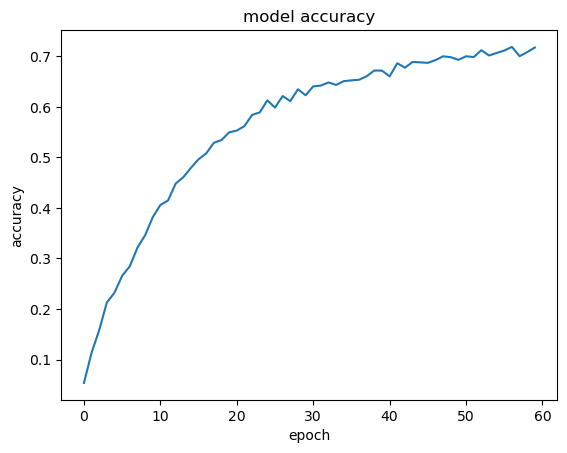

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 23ms/step


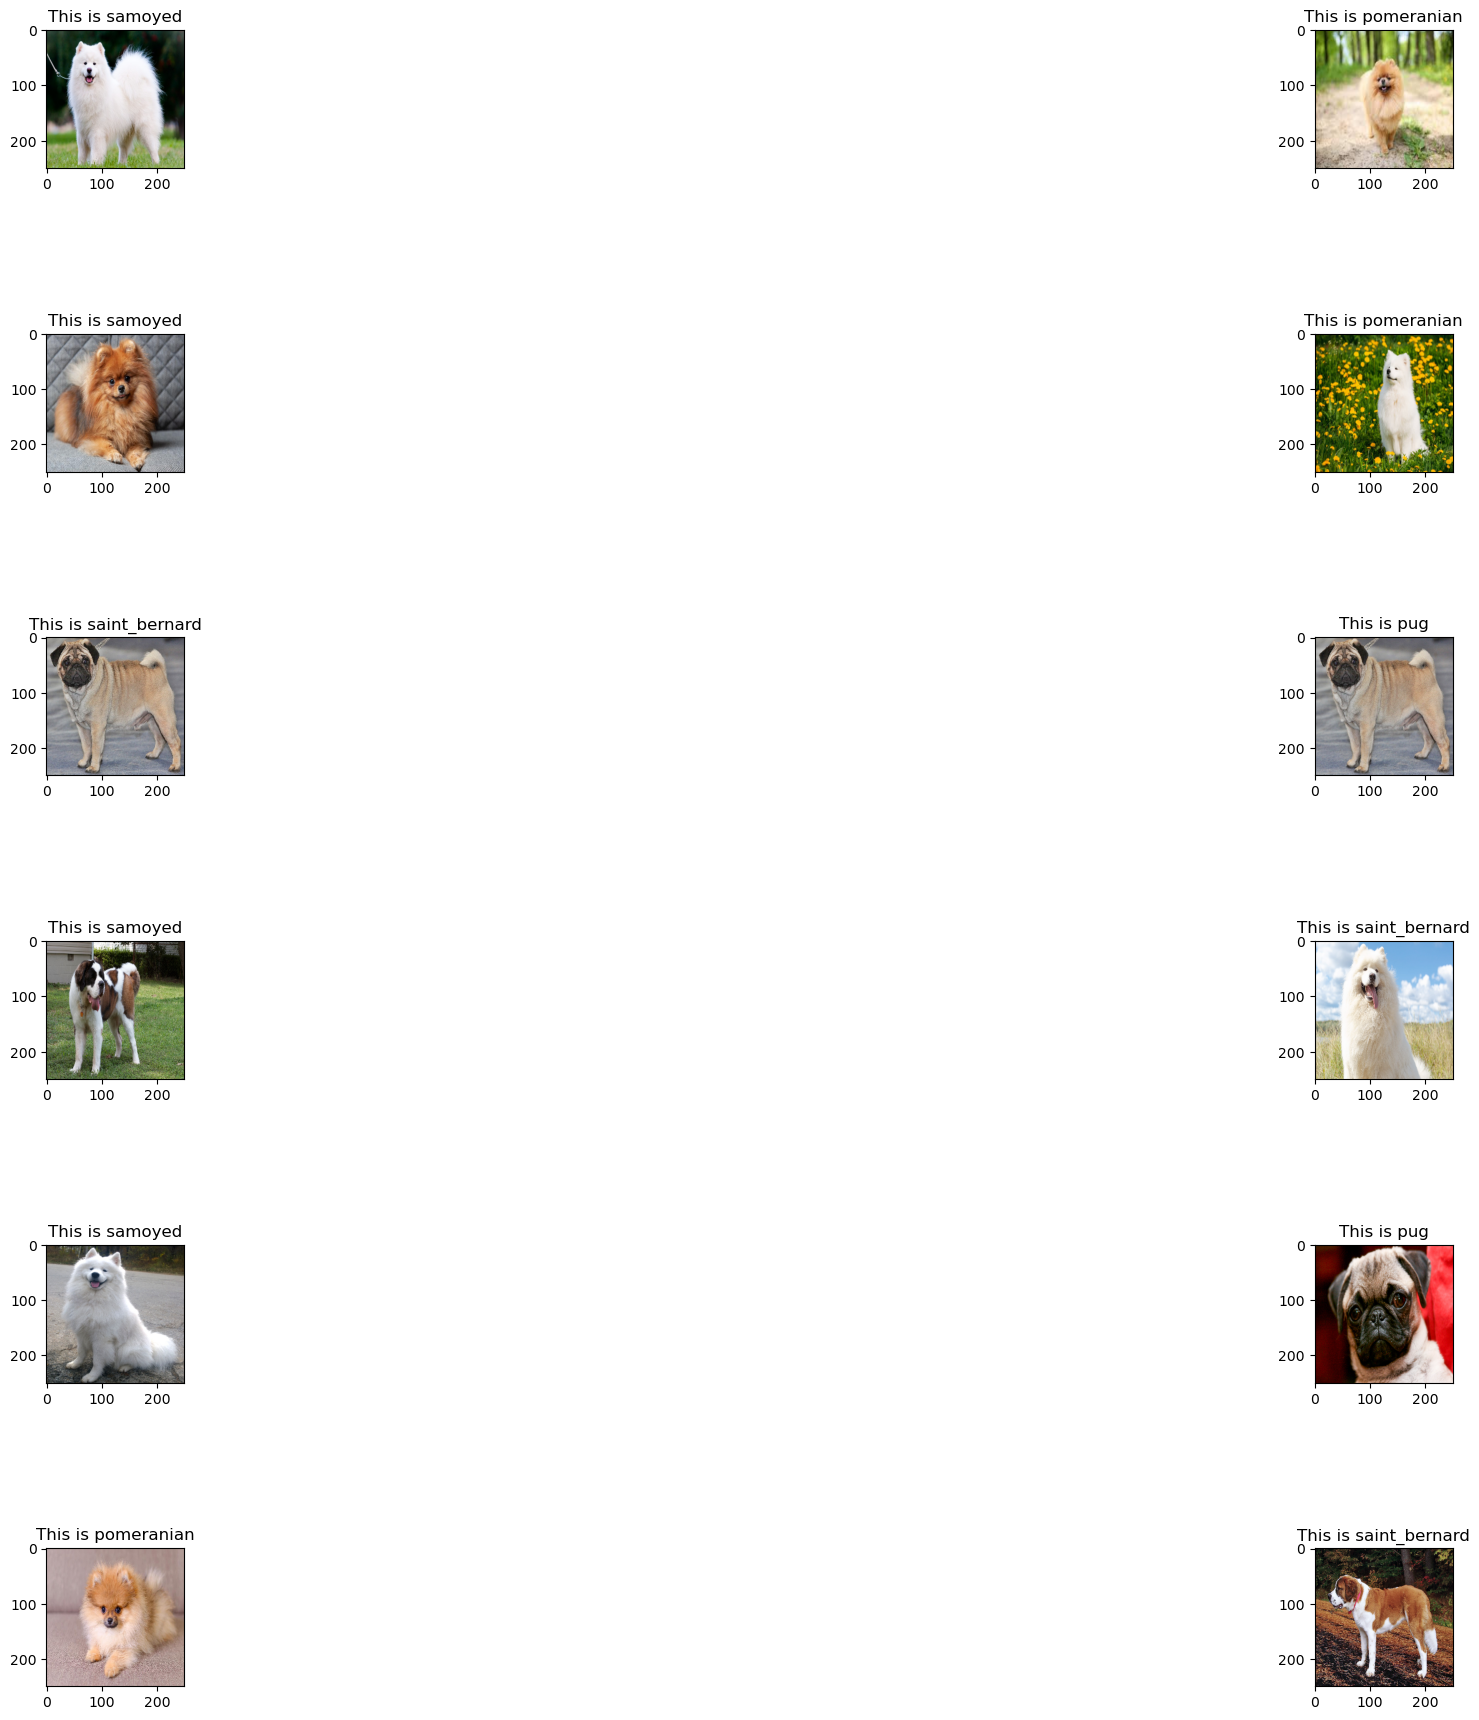

In [16]:
import matplotlib.pyplot as plt
#loaded_model = keras.models.load_model("/kaggle/input/custom-trained-cat-dog-breed-classifier/model_keras.h5")
loaded_model = my_model
images_directory = "/kaggle/input/some-validation-dogs"
resized_val_images = []
filenames = os.listdir(images_directory)
for f in filenames:
    resized_val_images.append(read_and_process(f))
test_datagen = ImageDataGenerator(rescale=1./255)

x = np.array(resized_val_images)
i = 0
text_labels = []
plt.figure(figsize=(30,20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.2)
for batch in test_datagen.flow(x,batch_size=1):
    pred = loaded_model.predict(batch)
    label = classnumber_to_name_dict[np.argmax(pred)]
    text_labels.append(label)
    image_to_show =cv2.cvtColor(resized_val_images[i], cv2.COLOR_BGR2RGB) # Opencv uses BGR instead of RGB...
    plt.subplot(7, 2,i+1)
    plt.title('This is ' + text_labels[i])
    imgplot = plt.imshow(image_to_show)
    i+=1
    if i % 12 == 0:
        break
        
plt.show()